In [1]:
import numpy as np

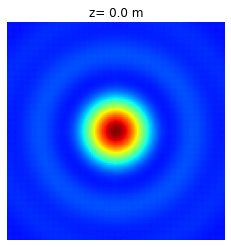

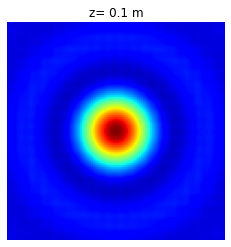

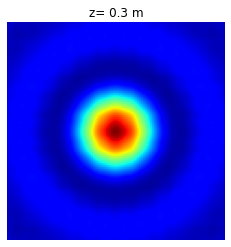

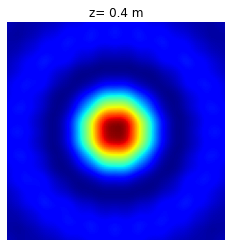

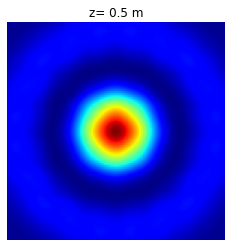

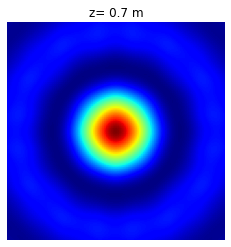

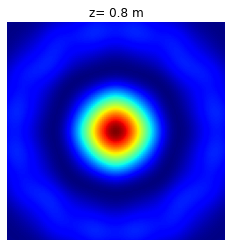

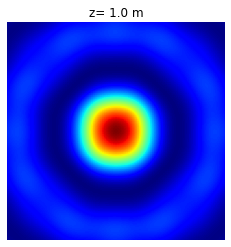

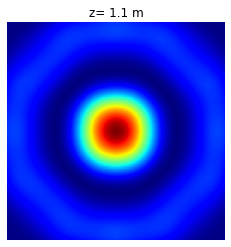

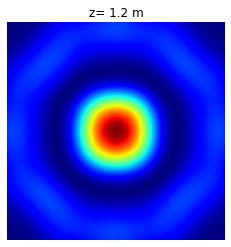

In [11]:
from LightPipes import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



wavelength=1000.0*nm
size=10*mm
N=1000

N2=int(N/2)
ZoomFactor=10
NZ=N2/ZoomFactor

phi=179.7/180*3.1415; n1=1.5
z_start=0.001*cm; z_end= 150*cm;
steps=11;
delta_z=(z_end-z_start)/steps
z=z_start

k=Begin(size,wavelength,N);
print(k)
#F=GaussBeam(F, size/3.5)
F=Axicon(phi,n1,0,0,k)
x=np.arange(1000)

for i in range(1,steps): 
    F=Fresnel(F,delta_z);           
    I=Intensity(F);
    #plt.subplot(2,5,i)
    s='z= %3.1f m' % (z/m)
    plt.title(s)
    plt.imshow(I,cmap='jet');plt.axis('off')
    plt.axis([N2-NZ, N2+NZ, N2-NZ, N2+NZ])
    z=z+delta_z
    plt.show()

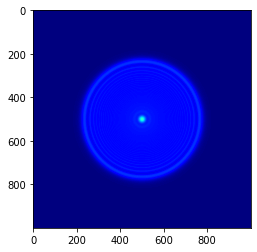

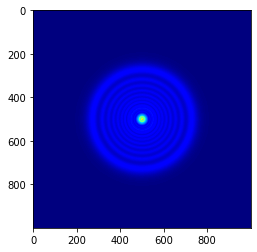

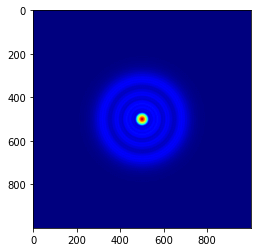

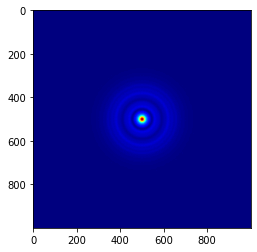

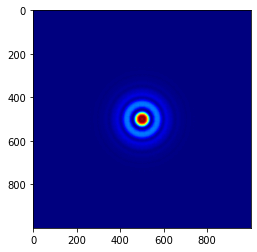

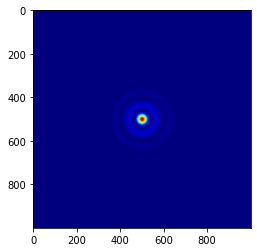

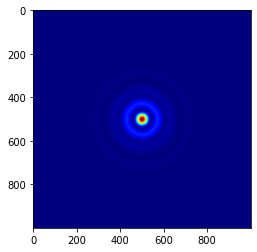

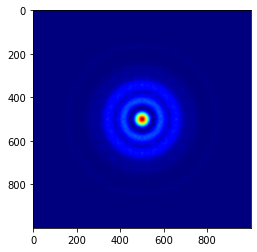

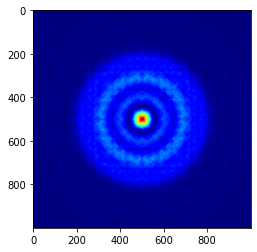

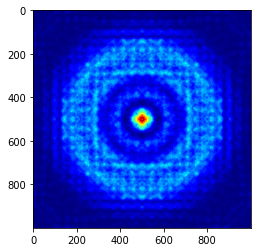

In [27]:
#Non-diffracting Bessel beam.

from LightPipes import *
import matplotlib.pyplot as plt

wavelength=1000*nm
size=10*mm
N=1000
phi=179.8*deg
n1=1.5
k = [10,20,30,40,50,60,70,80,90,100,110,120]
F=Begin(size,wavelength,N)
F= CircAperture(3*mm, 0, 0, F)

F=Axicon(phi,n1,0,0,F)
z = 10*cm
x = np.arange(1000)
for i in range(10):
    F=Forvard(z,F)
    I=Intensity(2,F)
    z = z + 10*cm
    #plt.plot(x,I[500])
    #plt.xlim(400,600)
    plt.imshow(I,cmap = 'jet')
    plt.show()


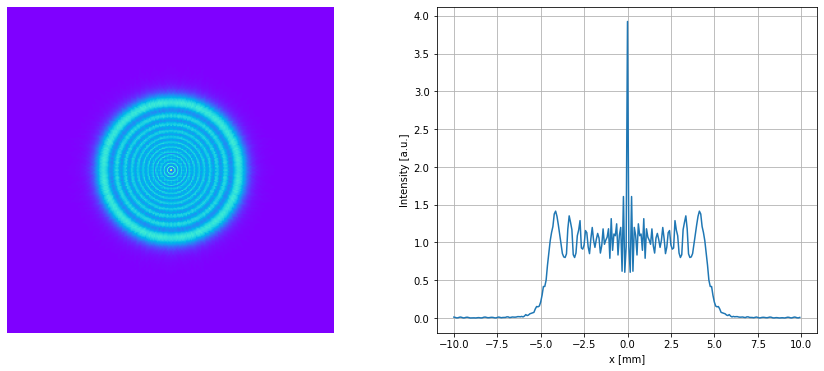

In [14]:
from LightPipes import *
import matplotlib.pyplot as plt

Field=Begin(20*mm, 1*um, 256)
Field = CircAperture(5*mm, 0, 0, Field)
Field = Forvard(1*m, Field)
I = Intensity(0,Field)

x=[]
for i in range(256):
    x.append((-20*mm/2+i*20*mm/256)/mm)

fig=plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(I,cmap='rainbow'); ax1.axis('off')
ax2.plot(x,I[128]);ax2.set_xlabel('x [mm]');ax2.set_ylabel('Intensity [a.u.]')
ax2.grid('on')
plt.show()